In [3]:
from google.colab import drive
drive.mount("/content/drive/")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
# notes: scanpy has several versions, afer 17May2020, it become 1.5.1 from 1.4.6
!pip install scanpy
!pip install leidenalg

In [0]:
#!pip install bbknn==1.3.6
!pip install bbknn
!pip install umap-learn==0.3.9

In [1]:
import h5py
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# notice that scanpy already became 1.5.1 after 17May2020
sc.settings.verbosity = 3 
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80, figsize=(4, 4))

scanpy==1.5.1 anndata==0.7.3 umap==0.3.9 numpy==1.18.4 scipy==1.4.1 pandas==1.0.3 scikit-learn==0.22.2.post1 statsmodels==0.10.2 python-igraph==0.8.2 leidenalg==0.8.0


In [0]:
import os
os.chdir("/content/drive/Shared drives/CARD/projects/iNDI/line_prioritization/projects_lirong/Florian_data")

In [12]:
%ls /content/drive/Shared\ drives/CARD/projects/iNDI/line_prioritization/projects_lirong/

3sets_15May2020.h5ad                 Florian_data/     pool_iPSC/
C9ORF72/                             forebrain/        proteomics_DIA/
concat3_donor_leiden_24May2020.h5ad  integrated_data/  results_for_meeting/
concat3_raw_donor.h5ad               NGN2/             temp2.h5ad
Excel_NGN2_vs_NIL/                   NIL/              temp.h5ad
filtered_feature_bc_matrix.h5        pbmc3k/           test_vireo/


#First check the concat_florian's data

In [4]:
%ls -lth

total 8.0G
-rw------- 1 root root 2.4G May 25 22:54  florian_concat_leiden.h5ad
-rw------- 1 root root 2.3G May 25 20:48  florian_concat_pca.h5ad
-rw------- 1 root root 1.8G May 25 19:13  florian_ipsc_whole_donor_raw.h5ad
-rw------- 1 root root  151 May 25 19:03  cortical_1_donor.csv
-rw------- 1 root root  153 May 25 19:03  cortical_2_donor.csv
-rw------- 1 root root  152 May 25 19:03  dopaminergic_1_donor.csv
-rw------- 1 root root  152 May 25 19:03  dopaminergic_2_donor.csv
-rw------- 1 root root  162 May 25 19:03  hypothalamic_1_donor.csv
-rw------- 1 root root  162 May 25 19:03  hypothalamic_2_donor.csv
-rw------- 1 root root 1.7G May 25 18:52  concat_florian_whole_donor_raw.h5ad
drwx------ 2 root root 4.0K May 25 18:50  cache/
-rw------- 1 root root  151 May 25 17:52 'Untitled spreadsheet.gsheet'
drwx------ 9 root root 4.0K May 25 16:13  vireo_cell_line_assignments/
-rw------- 1 root root  151 May 18 02:10  Florian_data.gslides
drwx------ 2 root root 4.0K May 17 00:46  cluster_ma

In [0]:
adata = sc.read_h5ad("florian_concat_leiden.h5ad")

In [5]:
adata

AnnData object with n_obs × n_vars = 60832 × 2954
    obs: 'donor_label', 'batch', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'leiden', 'leiden_0.6', 'leiden_0.4', 'leiden_0.2', 'leiden_0.1'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'leiden', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [0]:
%%time
sc.external.pp.bbknn(adata, batch_key='batch')

In [8]:
# need to recompute umap
sc.tl.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:01:25)


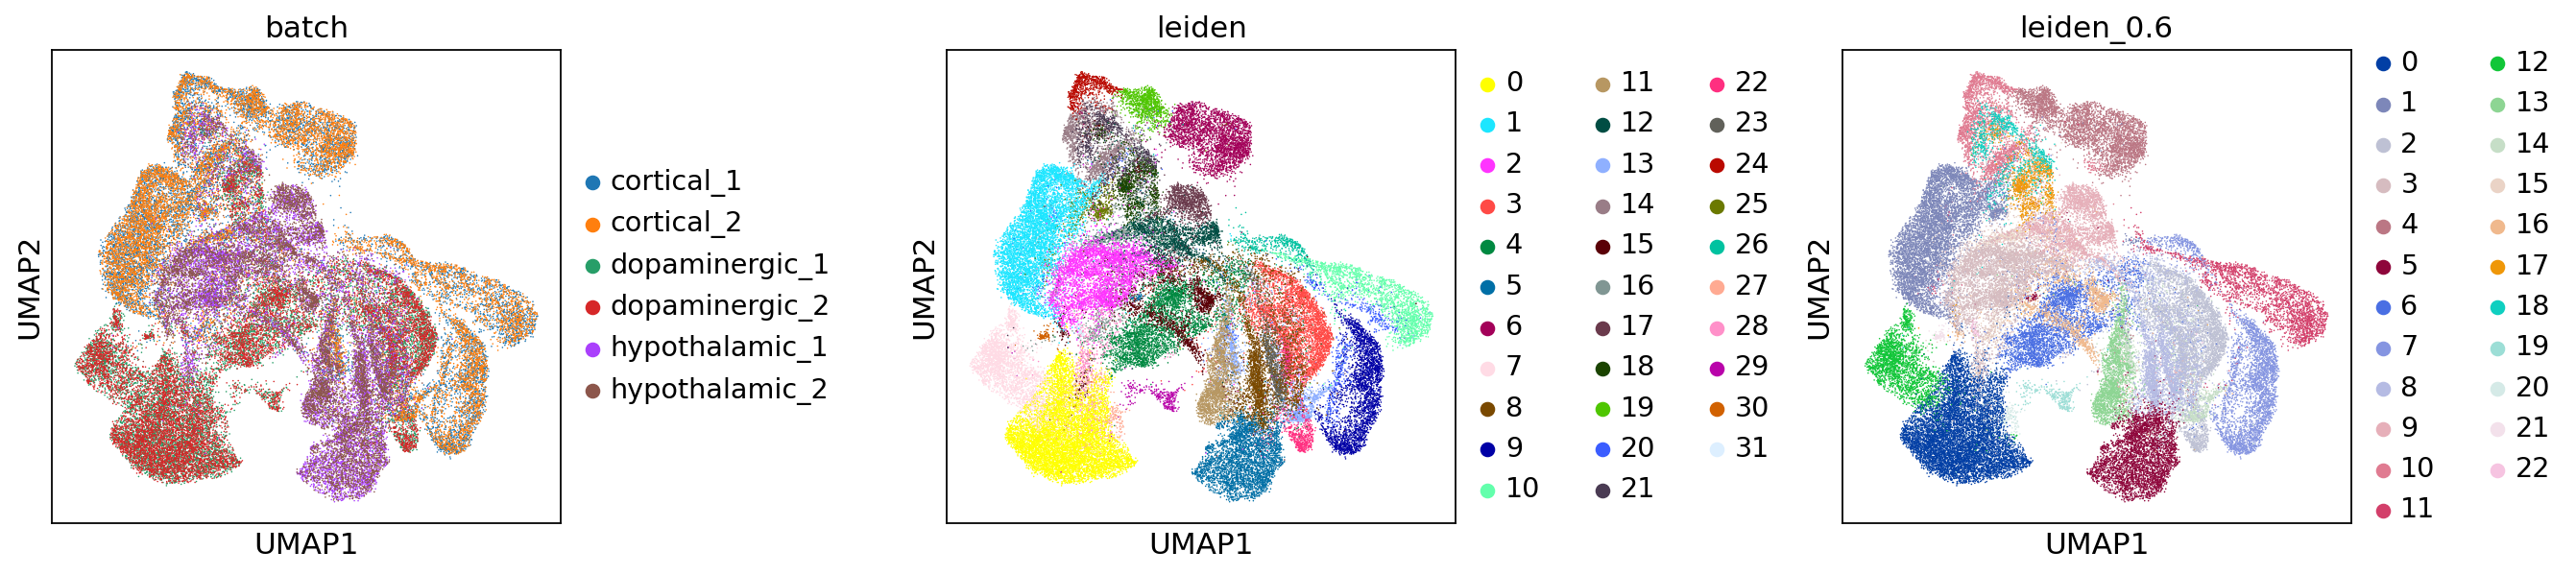

In [9]:
# it seems that batch correction actually doesn't make sense in this case
sc.pl.umap(adata, color=['batch', 'leiden', "leiden_0.6"], wspace=0.6)

In [0]:
batch_name =['cortical_1','cortical_2','dopaminergic_1','dopaminergic_2','hypothalamic_1','hypothalamic_2']

Trying to set attribute `.uns` of view, copying.


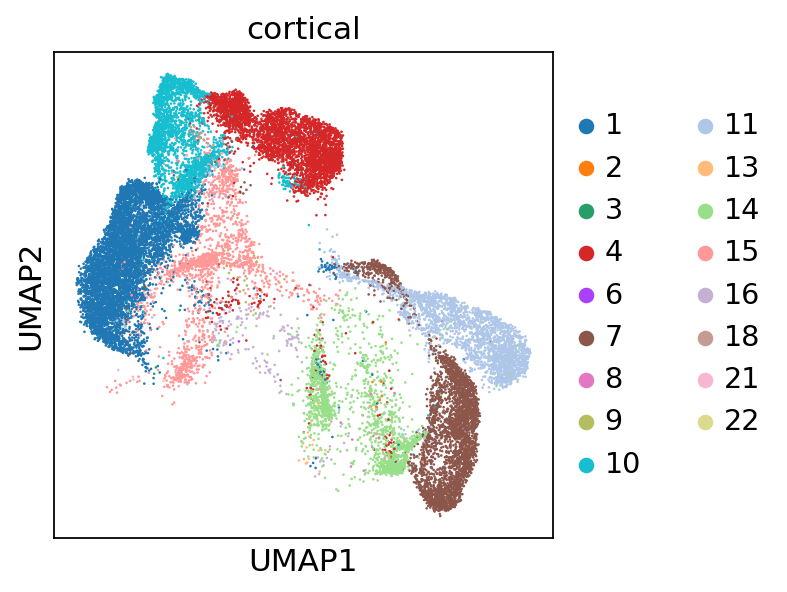

In [11]:
sc.pl.umap(adata[(adata.obs.batch=='cortical_1')|(adata.obs.batch=='cortical_2'), :], color=['leiden_0.6'], title="cortical")

Trying to set attribute `.uns` of view, copying.


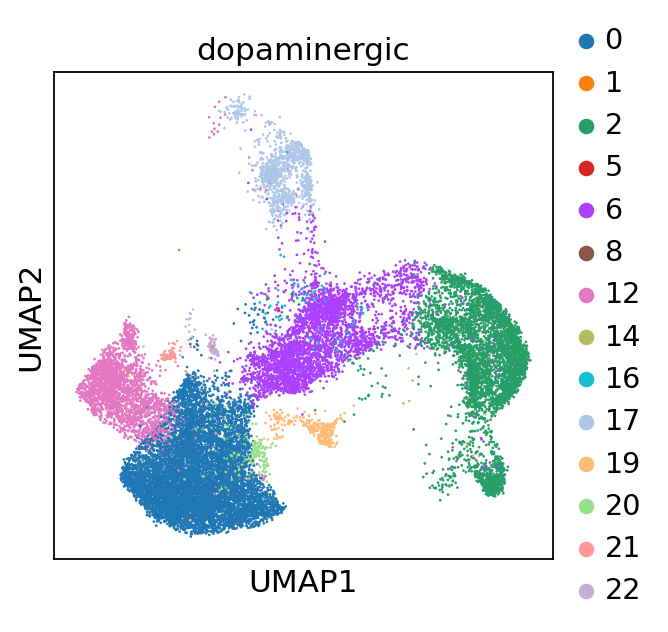

In [12]:
sc.pl.umap(adata[(adata.obs.batch=='dopaminergic_1')|(adata.obs.batch=='dopaminergic_2'), :], color=['leiden_0.6'], title="dopaminergic")

Trying to set attribute `.uns` of view, copying.


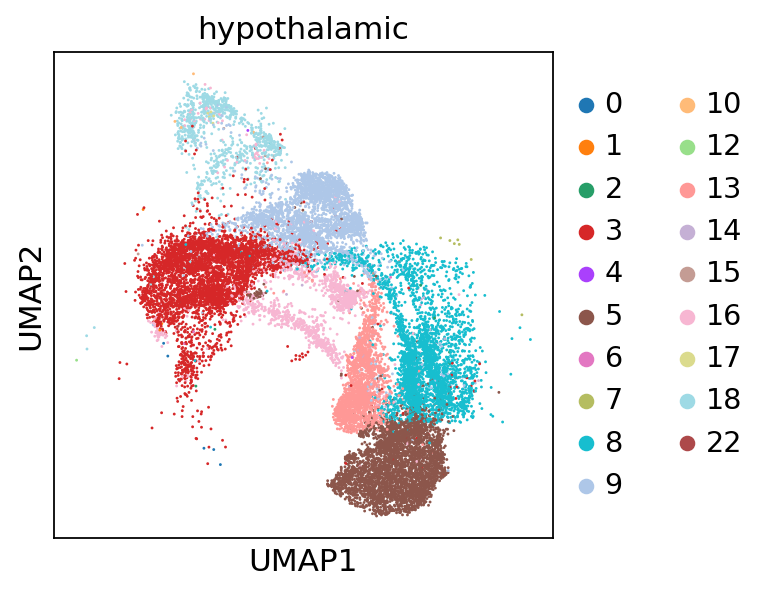

In [13]:
sc.pl.umap(adata[(adata.obs.batch=='hypothalamic_1')|(adata.obs.batch=='hypothalamic_2'), :], color=['leiden_0.6'], title="hypothalamic")